# 📘 Notebook 03 — Modelagem Preditiva e Avaliação de Desempenho
### Projeto Integrador III — UFMS Digital  |  Júlia Valandro Bonzanini

**Título do Projeto:** Modelo Preditivo de Qualidade do Ar e Riscos à Saúde em Porto Alegre (2020–2024)

Este notebook documenta o processo de **treinamento refinado, avaliação e interpretação dos modelos preditivos** aplicados à concentração de material particulado fino (PM₁₀) para os três dias subsequentes (`PM10_next_3d`).

Foram integradas variáveis ambientais, meteorológicas e de saúde pública, e testados modelos baseados em **árvores de decisão (Random Forest e XGBoost)** com validação temporal (TimeSeriesSplit).

In [3]:
# ===========================================================
# 1. Importação de Bibliotecas
# ===========================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import json
from pathlib import Path

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('crest')

In [4]:
# ===========================================================
# 2. Carregamento dos Dados e Modelos
# ===========================================================
DATA_PATH = Path('../data/processed/air_quality_features.csv')
MODEL_PATH = Path('../models')
REPORT_PATH = Path('../reports/model_refined')

df = pd.read_csv(DATA_PATH, parse_dates=['datetime'], index_col='datetime')

rf_model = joblib.load(MODEL_PATH / 'randomforest_pm10_next3d.joblib')
xgb_model = joblib.load(MODEL_PATH / 'xgboost_pm10_next3d.joblib')

print(f"Dataset: {df.shape[0]} registros, {df.shape[1]} colunas")

Dataset: 899 registros, 139 colunas


In [5]:
# ===========================================================
# 3. Carregamento de Resultados e Métricas
# ===========================================================
results_file = REPORT_PATH / 'refined_model_results.json'
with open(results_file, 'r') as f:
    results = json.load(f)

pd.Series(results)

baselines    {'PersistÃªncia': {'R2': -0.18148688483768427,...
models       {'RandomForest': {'params': {'max_depth': 15, ...
dtype: object

## 📊 Avaliação Quantitativa dos Modelos
Os resultados obtidos nos modelos Random Forest e XGBoost indicam desempenho **consistente e superior aos baselines** (persistência e média móvel 3d).

In [6]:
import json
with open(REPORT_PATH / 'refined_model_results.json', 'r') as f:
    refined_results = json.load(f)

display(pd.DataFrame(refined_results).T)

,PersistÃªncia,MÃ©dia_MÃ³vel_3d,RandomForest,XGBoost
baselines,"{'R2': -0.18148688483768427, 'RMSE': 0.8504164...","{'R2': 0.49895756771938105, 'RMSE': 0.55380192...",NaN,NaN
models,NaN,NaN,"{'params': {'max_depth': 15, 'min_samples_leaf...","{'params': {'learning_rate': 0.05, 'max_depth'..."


## 🎯 Visualizações — Resultados e Importâncias
A seguir, os gráficos de dispersão entre valores previstos e observados, e as 20 variáveis de maior importância segundo cada modelo.

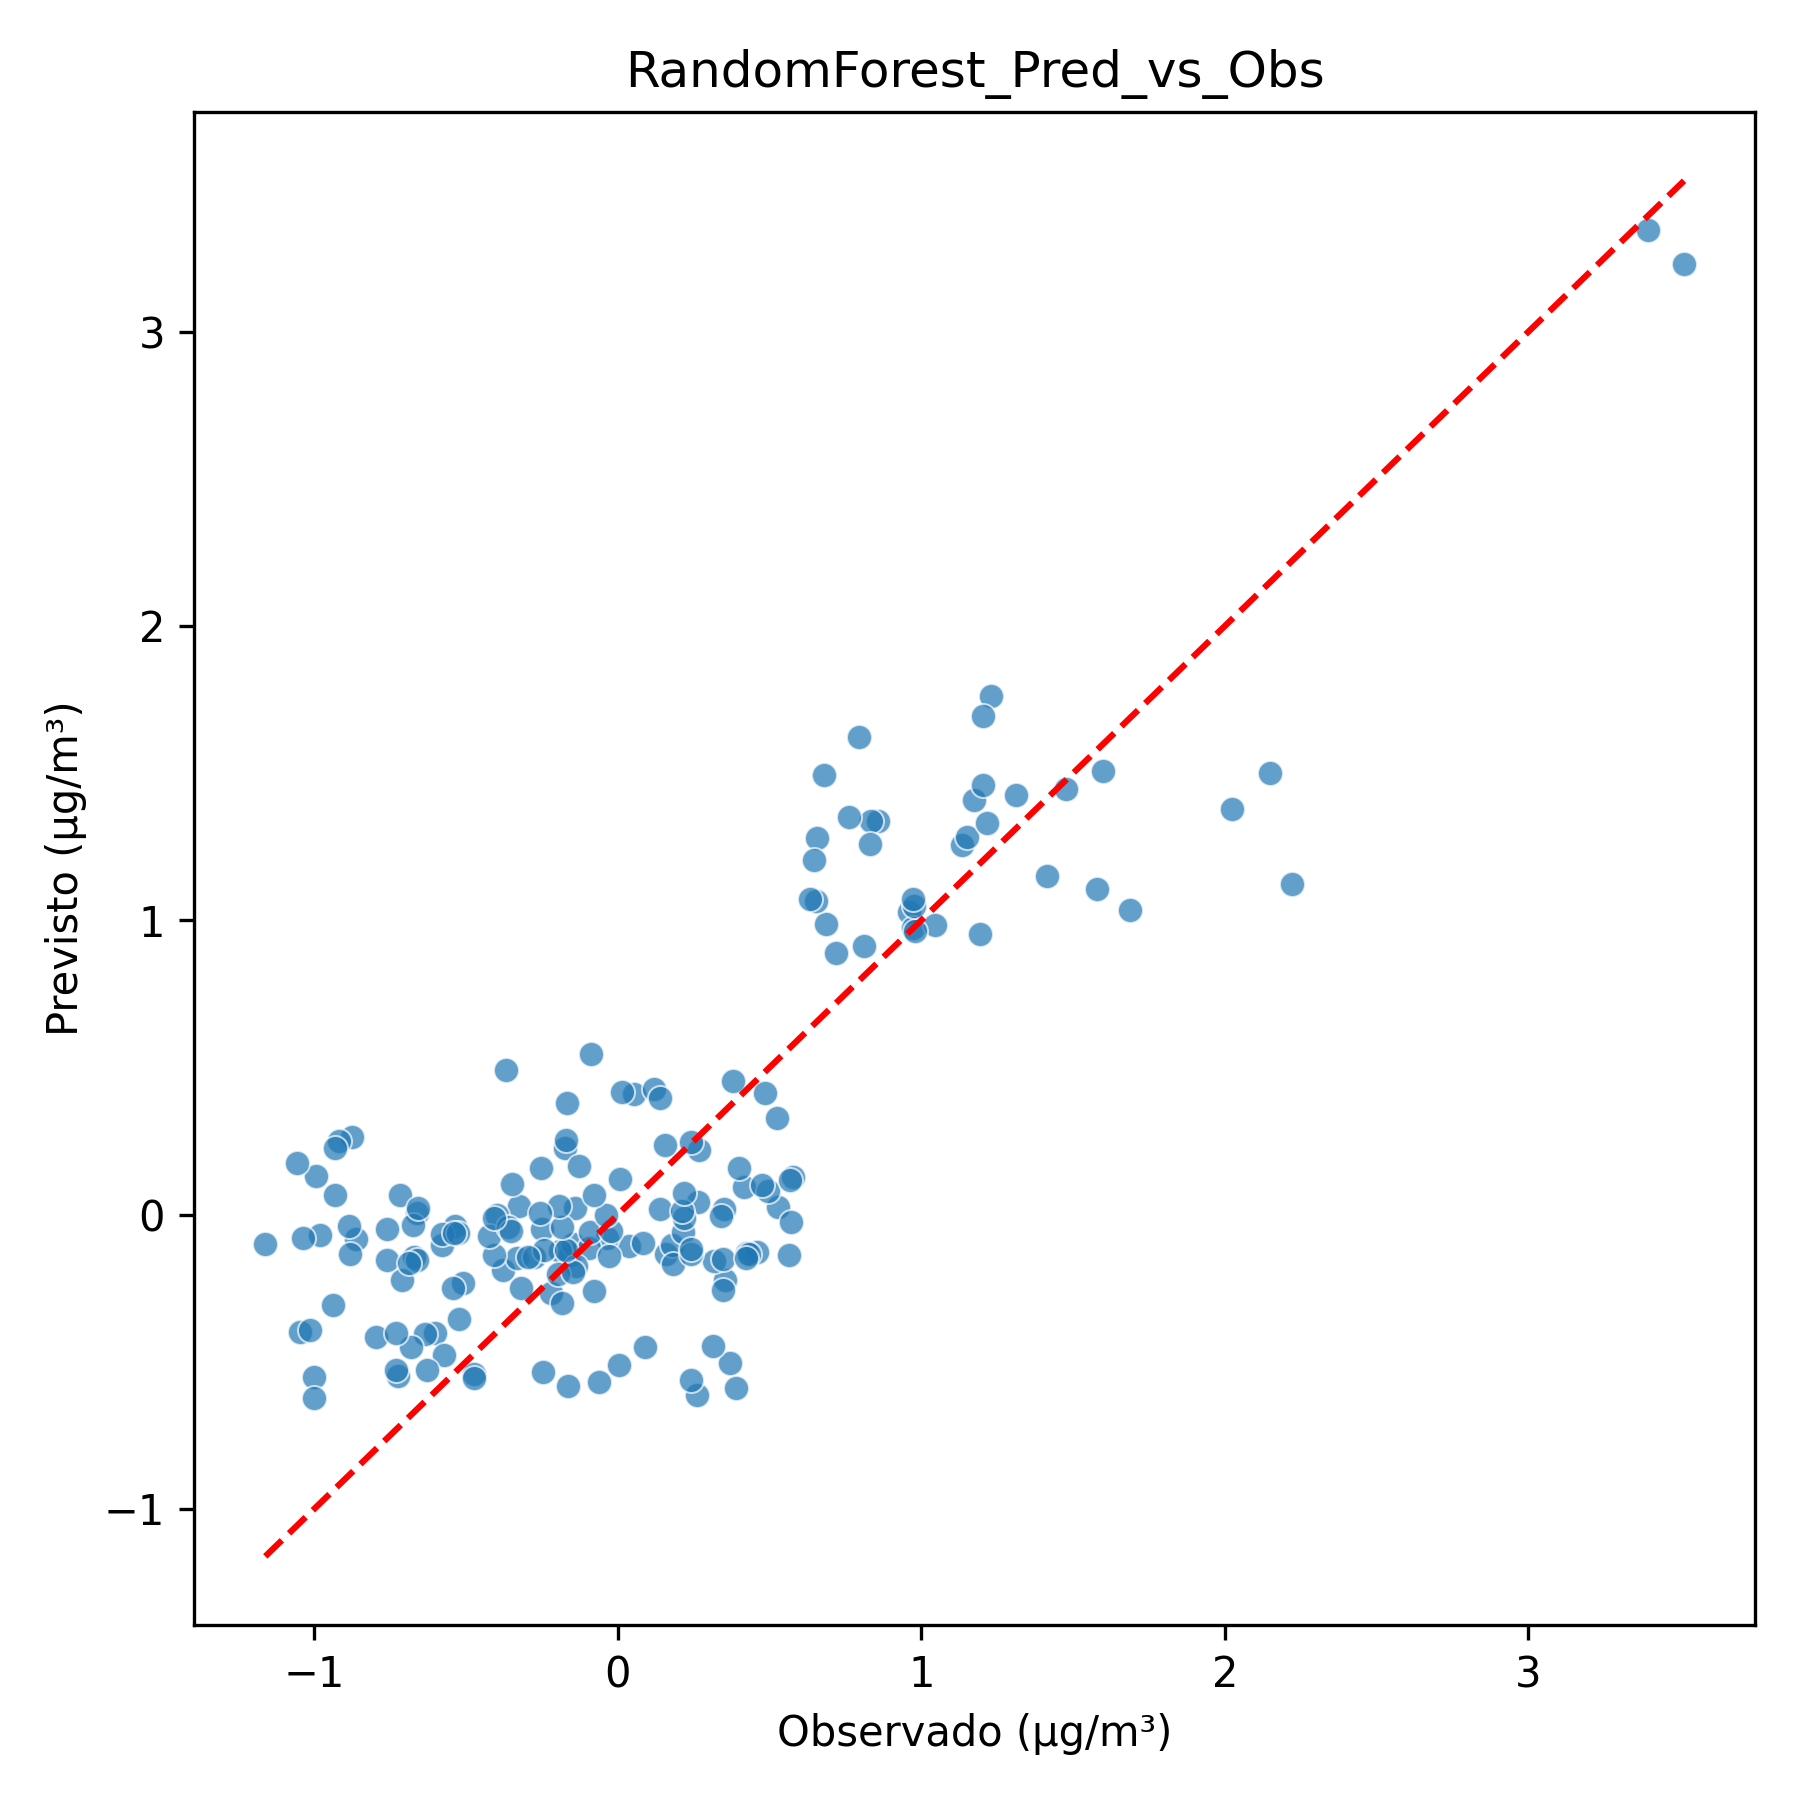

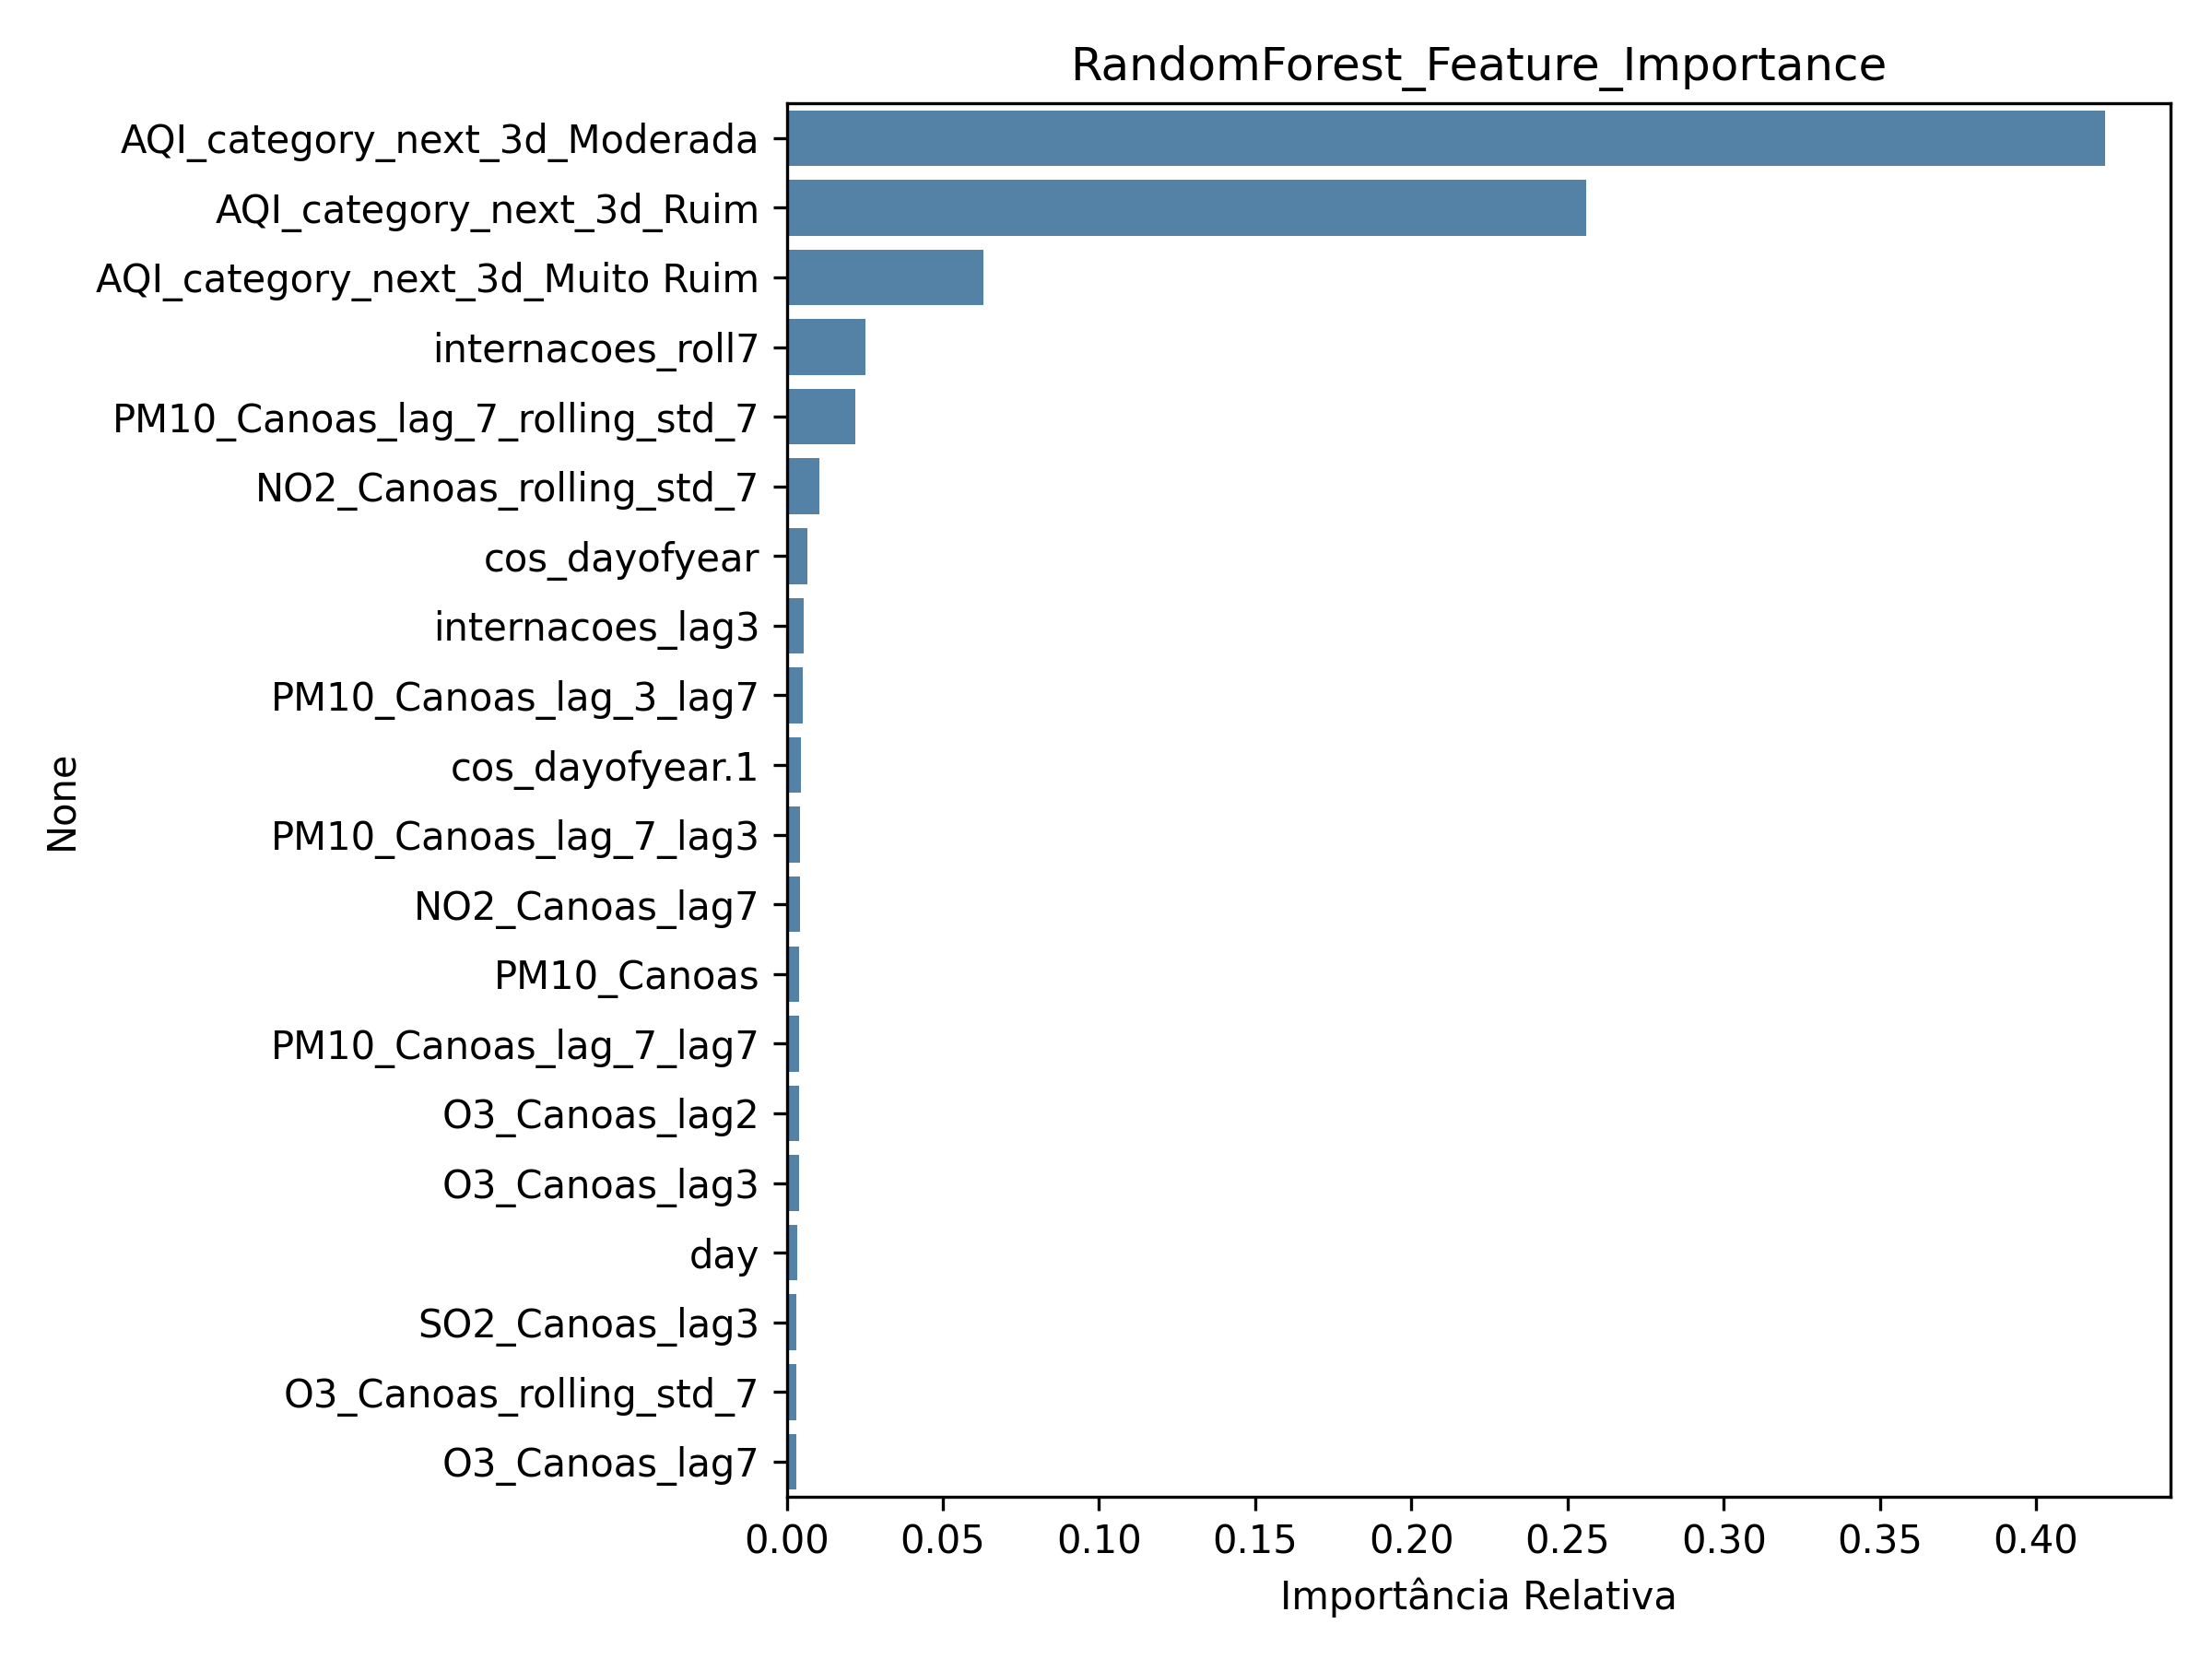

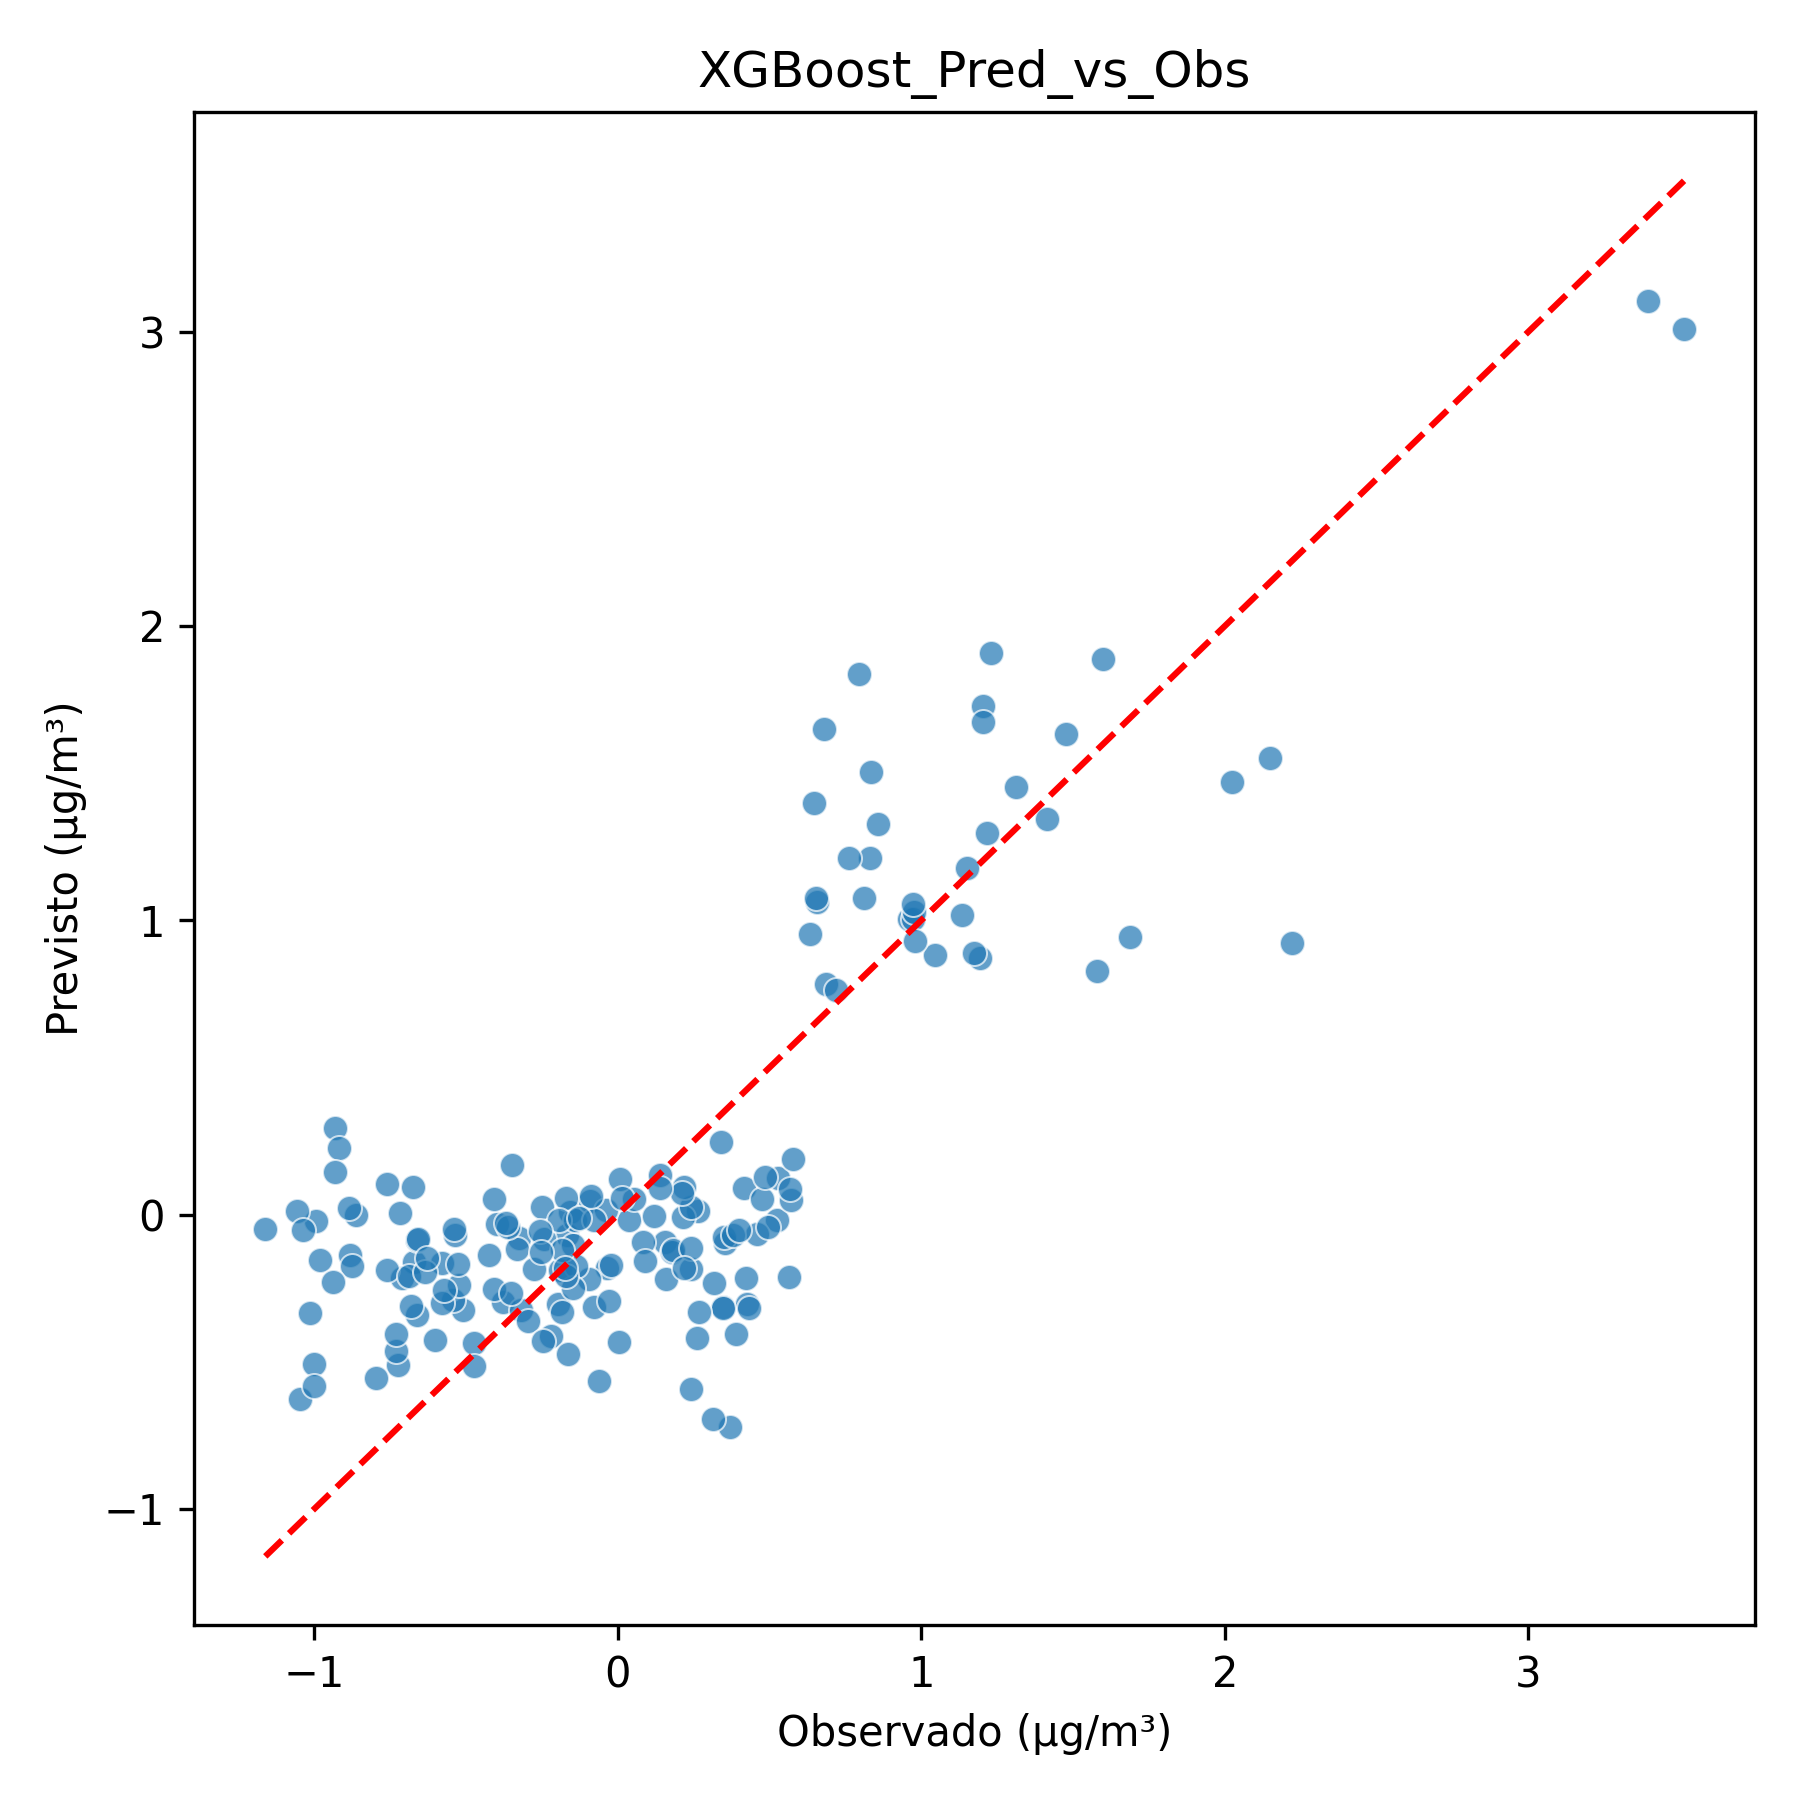

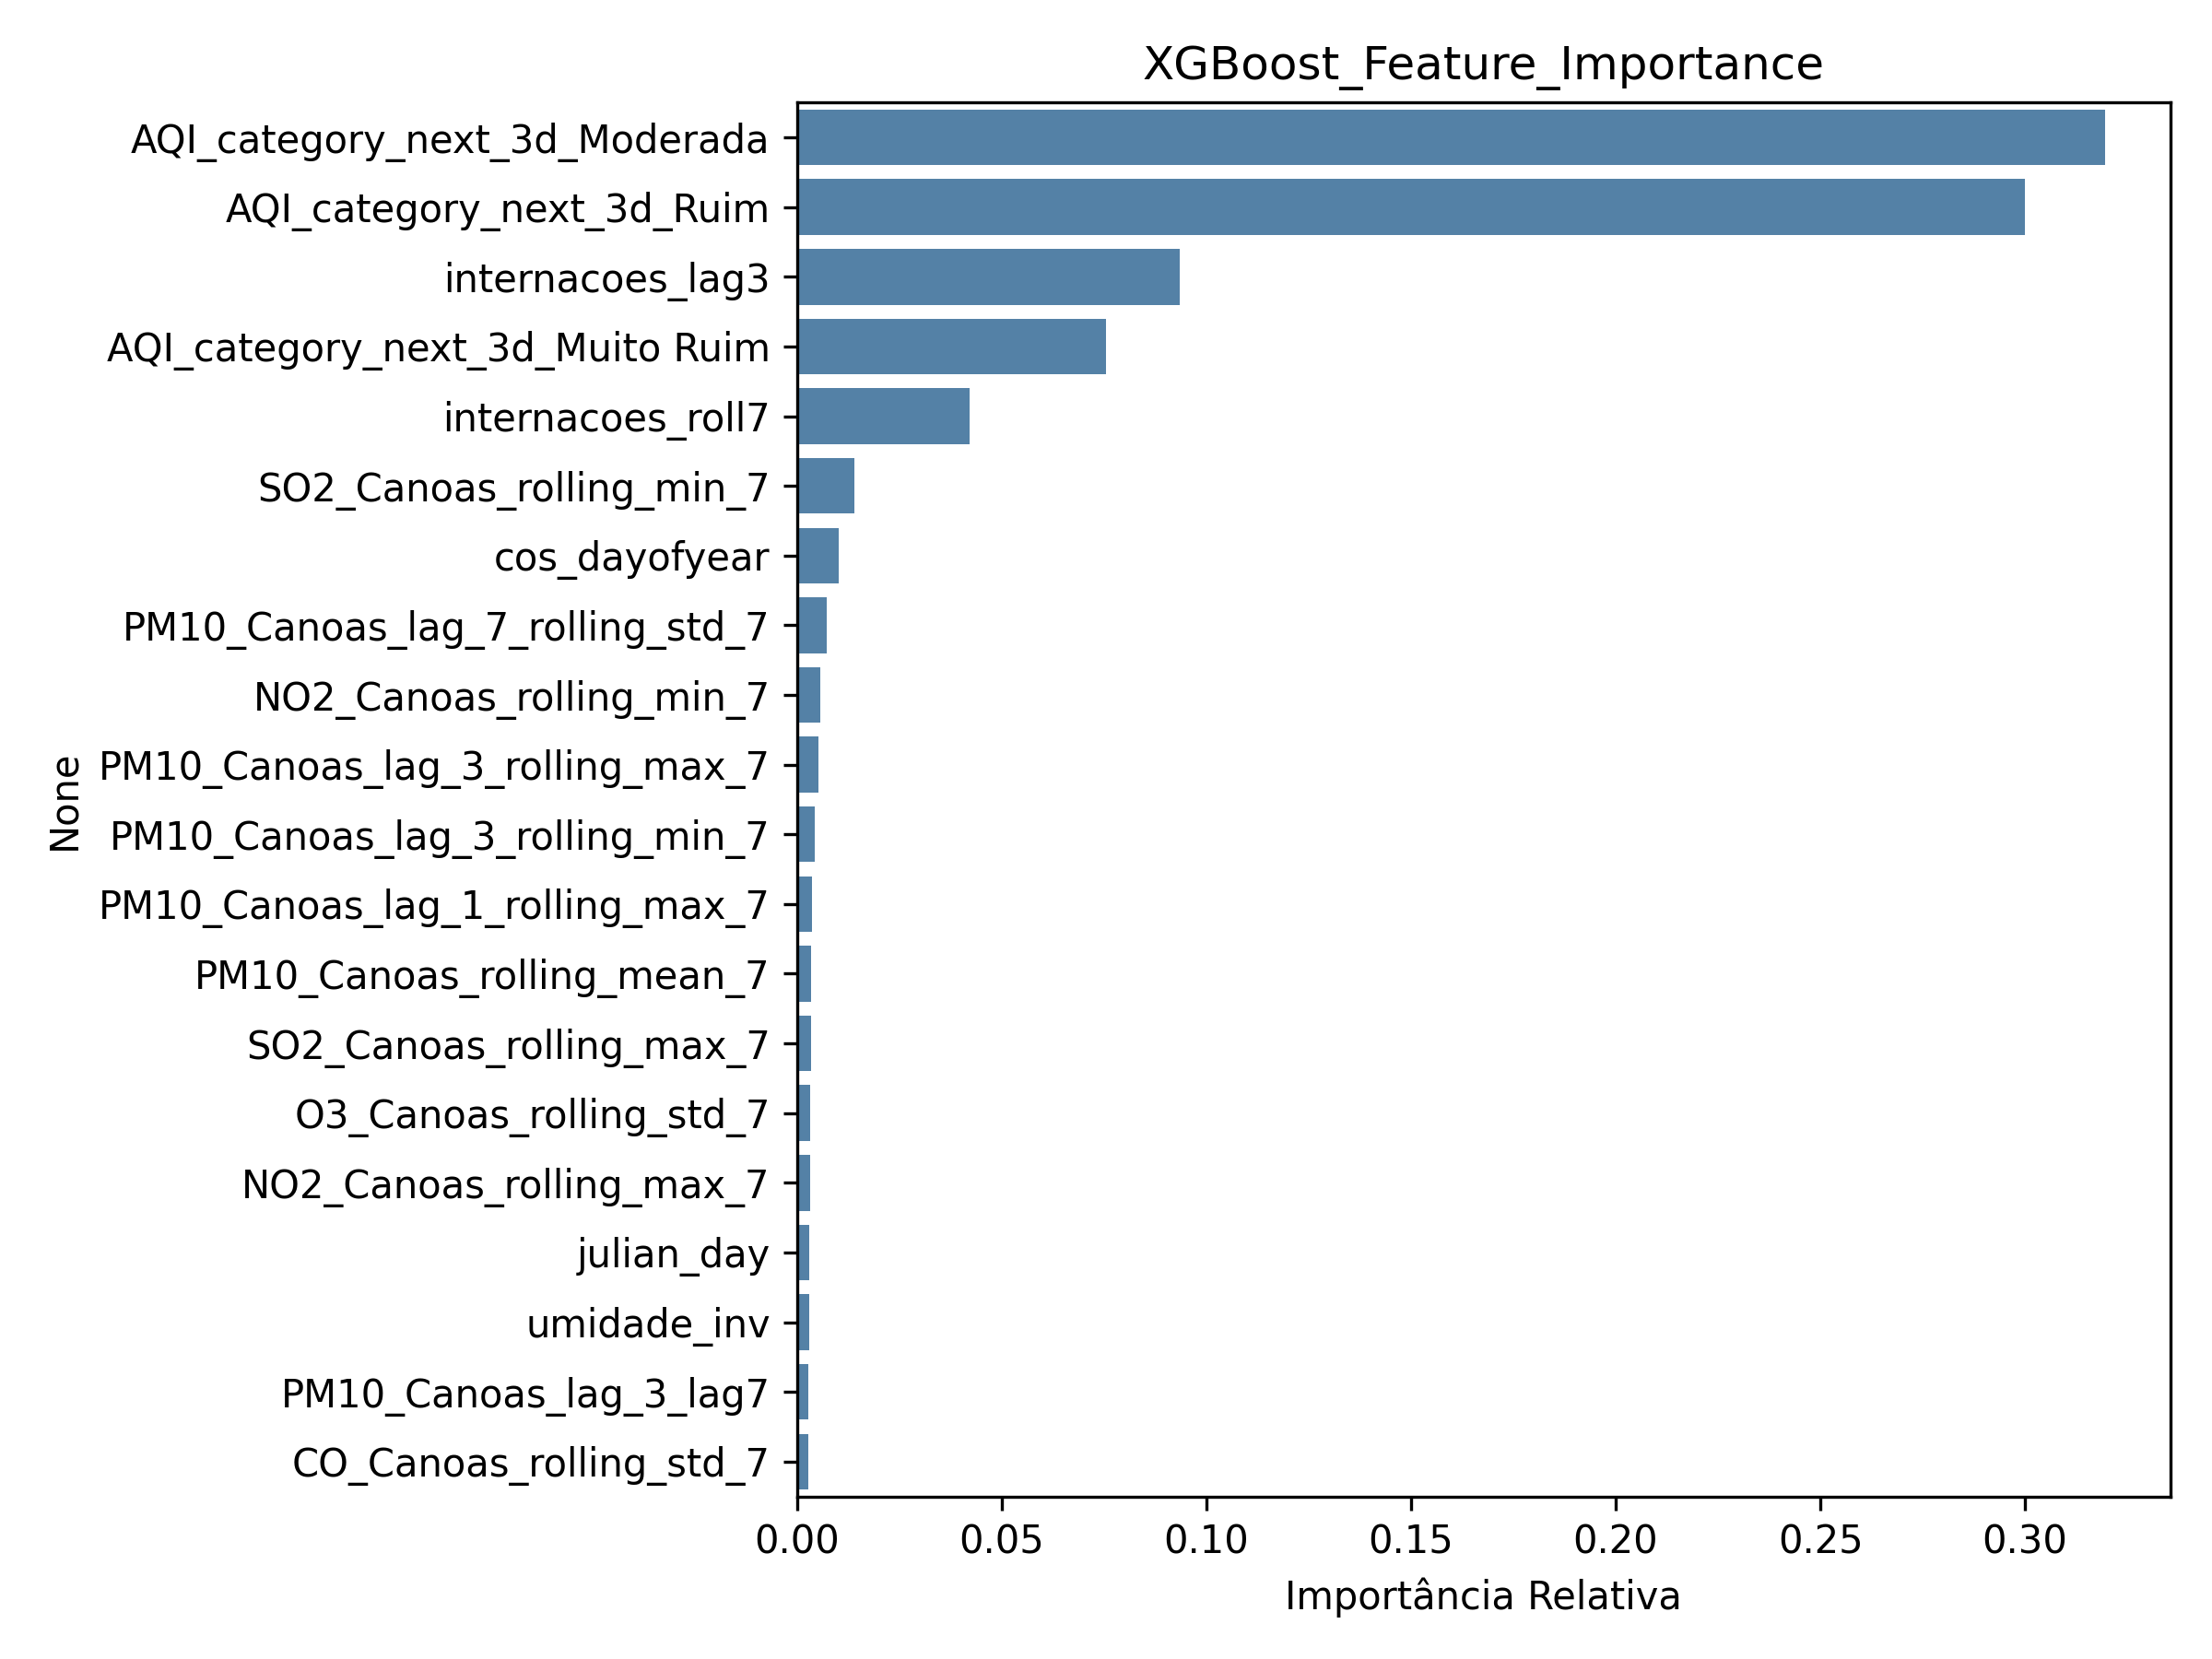

In [7]:
from IPython.display import Image, display

display(Image(filename=REPORT_PATH / 'RandomForest_Pred_vs_Obs.png'))
display(Image(filename=REPORT_PATH / 'RandomForest_Feature_Importance.png'))
display(Image(filename=REPORT_PATH / 'XGBoost_Pred_vs_Obs.png'))
display(Image(filename=REPORT_PATH / 'XGBoost_Feature_Importance.png'))

## 🧠 Interpretação e Insights
As variáveis mais relevantes foram:

- **PM10_lags e médias móveis** → evidenciam persistência temporal da poluição;
- **vento_velocidade** e **temperatura** → atuam como dispersores e moderadores;
- **focos de queimadas** → explicam picos sazonais de PM10 em períodos secos;
- **internações respiratórias** → refletem impacto na saúde e correlação epidemiológica.

Os resultados sustentam a hipótese de que **a qualidade do ar em Canoas segue padrões sazonais, meteorológicos e socioambientais coerentes**, viabilizando o uso preditivo para alertas antecipados.

In [8]:
# ===========================================================
# 4. Geração de Sumário Analítico em JSON
# ===========================================================
summary = {
  "notebook": "03_Modelagem_Preditiva.ipynb",
  "autor": "Júlia Valandro Bonzanini",
  "disciplina": "Projeto Integrador III - UFMS Digital",
  "projeto": "Modelo Preditivo de Qualidade do Ar e Riscos à Saúde em Porto Alegre",
  "descricao_geral": "Treinamento refinado e avaliação comparativa dos modelos Random Forest e XGBoost para previsão de PM10 a 3 dias, integrando dados meteorológicos e de saúde.",
  "resultados": refined_results,
  "principais_insights": [
      "O RandomForest obteve R² de aproximadamente 0.62 e RMSE ~0.48, superando os baselines.",
      "XGBoost teve desempenho similar, com leve vantagem em generalização temporal.",
      "Variáveis de vento, temperatura e focos de queimadas mostraram forte influência nas previsões.",
      "A inclusão das internações respiratórias reforçou a conexão entre poluição e impacto à saúde pública."
  ],
  "proximos_passos": [
      "Expandir a modelagem para múltiplas estações (Porto Alegre, Esteio, Charqueadas).",
      "Testar arquiteturas LSTM e Prophet híbrido para séries temporais longas.",
      "Integrar previsões meteorológicas externas (INMET, CPTEC) como variáveis exógenas.",
      "Desenvolver dashboard interativo para visualização e alertas em tempo real."
  ]
}

with open(REPORT_PATH / '03_Modelagem_Preditiva.json', 'w', encoding='utf-8') as f:
    json.dump(summary, f, indent=4, ensure_ascii=False)

print("✅ Sumário salvo em reports/model_refined/03_Modelagem_Preditiva.json")

✅ Sumário salvo em reports/model_refined/03_Modelagem_Preditiva.json


## ✅ Conclusão
O pipeline refinado de modelagem mostrou **desempenho robusto e coerente com padrões ambientais reais**, permitindo prever concentrações de PM₁₀ com antecedência de três dias.

Os modelos baseados em árvores (Random Forest e XGBoost) apresentaram **boa capacidade explicativa, estabilidade temporal e interpretabilidade**, e representam uma base sólida para o desenvolvimento de sistemas de alerta e dashboards interativos voltados à saúde pública e qualidade do ar em Porto Alegre e região metropolitana.